In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data = pd.read_csv('desktop/AI Class/Assignments/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [7]:
# Q2: Investigate the dataset for missing or problematic data.

# Basic dataset info
print("\nDataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())

# Check missing values
missing = data.isnull().sum()
missing_pct = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values:")
for col, count in missing[missing > 0].items():
    print(f"{col}: {count} values ({missing_pct[col]:.2f}%)")

# Check data types
print("\nData Types:")
print(data.dtypes)

# Check for duplicates
print("\nDuplicate Rows:", data.duplicated().sum())

# Sample of unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nSample of Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}:", data[col].unique().tolist())

# Check for any unexpected values
print("\nValue Ranges for Numeric Columns:")
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    print(f"\n{col}:")
    print(data[col].describe())


Dataset Shape: (12684, 26)

Columns: ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']

Missing Values:
car: 12576 values (99.15%)
Bar: 107 values (0.84%)
CoffeeHouse: 217 values (1.71%)
CarryAway: 151 values (1.19%)
RestaurantLessThan20: 130 values (1.02%)
Restaurant20To50: 189 values (1.49%)

Data Types:
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupat

In [11]:
# Q3: Decide what to do about your missing data -- drop, replace, other...

# Check missing values
print("Missing Values:")
print(data.isnull().sum()[data.isnull().sum() > 0])

# Drop rows with missing values if few, or fill with mode/median if many
if data.isnull().sum().max() / len(data) < 0.05:  # if less than 5% missing
    data = data.dropna()
else:
    # Fill missing values
    for col in data.columns:
        if data[col].dtype == 'object':  # categorical
            data[col] = data[col].fillna(data[col].mode()[0])
        else:  # numerical
            data[col] = data[col].fillna(data[col].median())

# Verify no missing values remain
print("\nRemaining missing values:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Missing Values:
Series([], dtype: int64)

Remaining missing values:
Series([], dtype: int64)


In [13]:
# Q4: What proportion of the total observations chose to accept the coupon?

acceptance_rate = data['Y'].mean()

print(f"Coupon acceptance rate: {acceptance_rate:.2%}")

Coupon acceptance rate: 56.84%


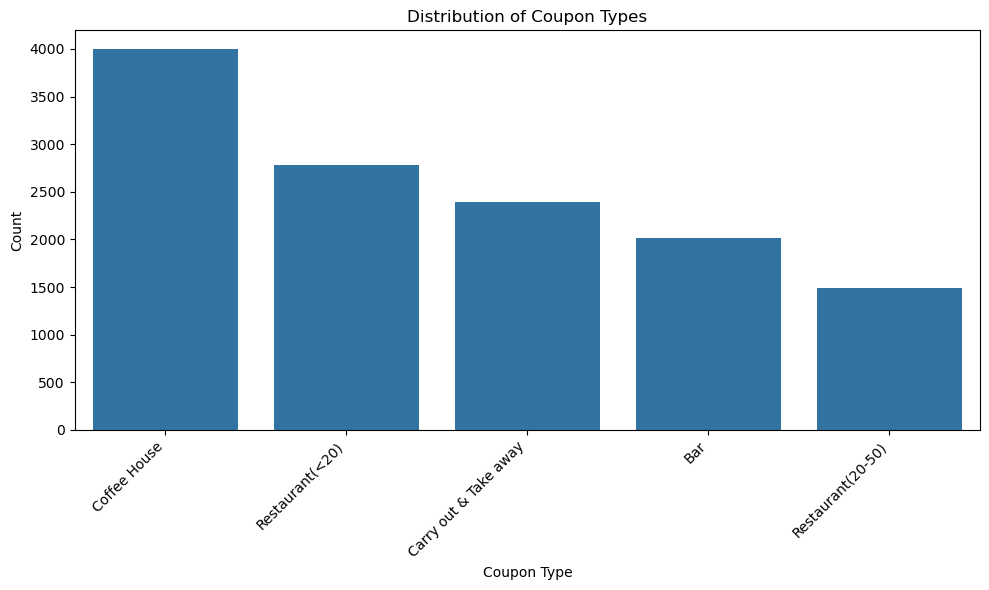

In [17]:
# So 56.84% of coupons were accepted

# Q5: Use a bar plot to visualize the coupon column.
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', order=data['coupon'].value_counts().index)

# Label plot
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # ha='right' helps align the rotated labels

plt.tight_layout()
plt.show()

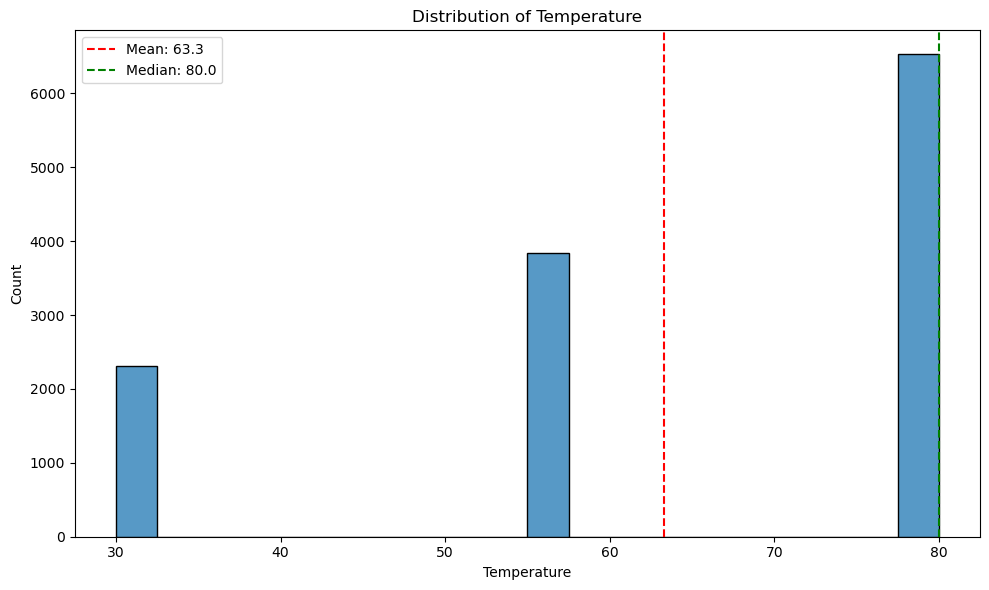

In [23]:
# Q6: Use a histogram to visualize the temperature column.

# Create histogram for temperature
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='temperature', bins=20)

# Label the plot
plt.title('Distribution of Temperature', fontsize=12)
plt.xlabel('Temperature', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Add mean and median lines
plt.axvline(data['temperature'].mean(), color='red', linestyle='dashed', label=f'Mean: {data["temperature"].mean():.1f}')
plt.axvline(data['temperature'].median(), color='green', linestyle='dashed', label=f'Median: {data["temperature"].median():.1f}')

plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Part 2 - Q1: Create a new DataFrame that contains just the bar coupons.

bar_coupons = data[data['coupon'] == 'Bar']

# Display first few rows 
print("Shape of bar coupons DataFrame:", bar_coupons.shape)
print("\nFirst few rows:")
print(bar_coupons.head())

Shape of bar coupons DataFrame: (2017, 26)

First few rows:
        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...        never       1~3   
13  Female  21  Unmarried partner  ...        never       1~3   
17  Female  21  Unmarried partner  ...        never       1~3   
24    Male  21             Single  ...        less1       4~8   
35    Male  21             Single  ...        less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15mi

In [27]:
# Q2: What proportion of bar coupons were accepted?

acceptance_rate = bar_coupons['Y'].mean()

print(f"Bar coupon acceptance rate: {acceptance_rate:.2%}")

Bar coupon acceptance rate: 41.00%


In [33]:
# So 41% acceptance rate is for bar coupons.  This is lower than the overall coupon acceptance rate of 56.8%. 

# Q3: Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

# Create a copy of the DataFrame first
bar_coupons = bar_coupons.copy()

# Categories that show 3 or fewer times
less_than_3 = ['never', 'less1', '1~3']
bar_coupons['bar_freq_group'] = bar_coupons['Bar'].apply(lambda x: '3 or fewer times' if x in less_than_3 else 'more than 3 times')

# Acceptance rates for each group
acceptance_by_freq = bar_coupons.groupby('bar_freq_group')['Y'].agg(['count', 'mean'])
acceptance_by_freq.columns = ['Total Count', 'Acceptance Rate']
acceptance_by_freq['Accepted Count'] = bar_coupons.groupby('bar_freq_group')['Y'].sum()

print("Bar Coupon Acceptance Rate by Bar Frequency:")
print("\nDetailed Statistics:")
print(acceptance_by_freq)
print("\nAcceptance Rates:")
for idx, row in acceptance_by_freq.iterrows():
    print(f"{idx}: {row['Acceptance Rate']:.1%} ({row['Accepted Count']} out of {row['Total Count']})")

Bar Coupon Acceptance Rate by Bar Frequency:

Detailed Statistics:
                   Total Count  Acceptance Rate  Accepted Count
bar_freq_group                                                 
3 or fewer times          1818         0.370737             674
more than 3 times          199         0.768844             153

Acceptance Rates:
3 or fewer times: 37.1% (674.0 out of 1818.0)
more than 3 times: 76.9% (153.0 out of 199.0)


In [39]:
# So those who go to bars 3 times or fewer acceptance rate is 37.1%.  Those who go more than 3 times accptance rate is 76.9%.  So this means that previous bar going behavior is a strong predictor of bar coupon acceptance.

# Q4: Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

# Create a copy of the DataFrame
bar_coupons = bar_coupons.copy()

# Convert age categories to numeric values
bar_coupons['age'] = (bar_coupons['age']
                      .replace({'below21': '20', '50plus': '50'})
                      .astype(int))

# Conditions 
frequent_bar = ~bar_coupons['Bar'].isin(['never', 'less1'])  # More than once a month
over_25 = bar_coupons['age'] > 25
target_group = frequent_bar & over_25

# Grouping column
bar_coupons['driver_group'] = np.where(target_group, 
                                      'Bar>1x/month & Age>25', 
                                      'Others')

# Calculate acceptance rates
acceptance_by_group = bar_coupons.groupby('driver_group')['Y'].agg(['count', 'mean'])
acceptance_by_group.columns = ['Total Count', 'Acceptance Rate']
acceptance_by_group['Accepted Count'] = bar_coupons.groupby('driver_group')['Y'].sum()

print("Bar Coupon Acceptance Rate Comparison:")
print("\nDetailed Statistics:")
print(acceptance_by_group)
print("\nAcceptance Rates:")
for idx, row in acceptance_by_group.iterrows():
    print(f"{idx}: {row['Acceptance Rate']:.1%} ({row['Accepted Count']} out of {row['Total Count']})")

Bar Coupon Acceptance Rate Comparison:

Detailed Statistics:
                       Total Count  Acceptance Rate  Accepted Count
driver_group                                                       
Bar>1x/month & Age>25          420         0.695238             292
Others                        1597         0.335003             535

Acceptance Rates:
Bar>1x/month & Age>25: 69.5% (292.0 out of 420.0)
Others: 33.5% (535.0 out of 1597.0)


In [41]:
# So Bar>once a month & Age>25  has 69.5% acceptance rate.  Others is 33.5%. 

# Q5: Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

# Create a copy of the DataFrame
bar_coupons = bar_coupons.copy()

# Condition
frequent_bar = ~bar_coupons['Bar'].isin(['never', 'less1'])
not_kid_passenger = ~bar_coupons['passanger'].isin(['Kid(s)'])
not_farming = ~bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])
target_group = frequent_bar & not_kid_passenger & not_farming

# Grouping column
bar_coupons['driver_group'] = np.where(target_group, 
                                      'Bar>1x/month & Not Kid & Not Farming', 
                                      'Others')

# Calculate acceptance rates
acceptance_by_group = bar_coupons.groupby('driver_group')['Y'].agg(['count', 'mean'])
acceptance_by_group.columns = ['Total Count', 'Acceptance Rate']
acceptance_by_group['Accepted Count'] = bar_coupons.groupby('driver_group')['Y'].sum()

print("Bar Coupon Acceptance Rate Comparison:")
print("\nDetailed Statistics:")
print(acceptance_by_group)
print("\nAcceptance Rates:")
for idx, row in acceptance_by_group.iterrows():
    print(f"{idx}: {row['Acceptance Rate']:.1%} ({row['Accepted Count']} out of {row['Total Count']})")


Bar Coupon Acceptance Rate Comparison:

Detailed Statistics:
                                      Total Count  Acceptance Rate  \
driver_group                                                         
Bar>1x/month & Not Kid & Not Farming          551         0.713249   
Others                                       1466         0.296044   

                                      Accepted Count  
driver_group                                          
Bar>1x/month & Not Kid & Not Farming             393  
Others                                           434  

Acceptance Rates:
Bar>1x/month & Not Kid & Not Farming: 71.3% (393.0 out of 551.0)
Others: 29.6% (434.0 out of 1466.0)


In [45]:
# So Bar> once a month & NoKids & NotFarming has acceptance rate of 71.3%, where as others have acceptance rate of 29.6%. So this group accepts coupons at alot higher rate than others.
# So Bar> once a month & NoKids & NotFarming factors are strong predictors of bar coupon acceptance. 

# Q6: To compare the acceptance rates between those drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR go to bars more than once a month and are under the age of 30 OR go to cheap restaurants more than 4 times a month and income is less than 50K.

# Create a copy of the DataFrame
bar_coupons = bar_coupons.copy()

# Convert age to numeric values
bar_coupons['age'] = bar_coupons['age'].replace({'below21': '20', '50plus': '50'}).astype(int)

# Conditions
frequent_bar = ~bar_coupons['Bar'].isin(['never', 'less1'])  
not_kid_passenger = ~bar_coupons['passanger'].isin(['Kid(s)'])  
not_widowed = ~bar_coupons['maritalStatus'].isin(['Widowed'])  
under_30 = bar_coupons['age'] < 30  
frequent_cheap_rest = bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])  
income_under_50k = bar_coupons['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

# Group
group1 = frequent_bar & not_kid_passenger & not_widowed
group2 = frequent_bar & under_30
group3 = frequent_cheap_rest & income_under_50k

# Grouping column
bar_coupons['driver_group'] = 'Others'
bar_coupons.loc[group1, 'driver_group'] = 'Bar>1 & NotKid & NotWidowed'
bar_coupons.loc[group2, 'driver_group'] = 'Bar>1 & Age<30'
bar_coupons.loc[group3, 'driver_group'] = 'CheapRest>4 & Income<50K'

# Calculate acceptance rates
acceptance_by_group = bar_coupons.groupby('driver_group')['Y'].agg(['count', 'mean'])
acceptance_by_group.columns = ['Total Count', 'Acceptance Rate']
acceptance_by_group['Accepted Count'] = bar_coupons.groupby('driver_group')['Y'].sum()

print("Bar Coupon Acceptance Rate Comparison:")
print("\nDetailed Statistics:")
print(acceptance_by_group)
print("\nAcceptance Rates:")
for idx, row in acceptance_by_group.iterrows():
    print(f"{idx}: {row['Acceptance Rate']:.1%} ({row['Accepted Count']} out of {row['Total Count']})")


Bar Coupon Acceptance Rate Comparison:

Detailed Statistics:
                             Total Count  Acceptance Rate  Accepted Count
driver_group                                                             
Bar>1 & Age<30                       249         0.706827             176
Bar>1 & NotKid & NotWidowed          183         0.683060             125
CheapRest>4 & Income<50K             344         0.453488             156
Others                              1241         0.298147             370

Acceptance Rates:
Bar>1 & Age<30: 70.7% (176.0 out of 249.0)
Bar>1 & NotKid & NotWidowed: 68.3% (125.0 out of 183.0)
CheapRest>4 & Income<50K: 45.3% (156.0 out of 344.0)
Others: 29.8% (370.0 out of 1241.0)


In [47]:
# So Bar>1 & Age<30 have acceptance rate of 70.7%,  the group of Bar>1 & NotKid & NotWidowed have acceptance rate of 68.3%, the group of CheapRest>4 & Income<50K have acceptance rate of 45.3% and others have accepatance rate of 29.8%
# Q7: Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Age:  Younger drivers (under 30) who frequently visit bars show a higher acceptance rate. This could be due to younger people generally being more socially active and more likely to visit bars
# Lifestyle: People who already go to bars more than once a month and don't have kids as passengers are more likely to accept bar coupons
# Income: Those who frequently visit cheaper restaurants and have lower income also show higher acceptance rates. This might suggest that price sensitivity and deal-seeking behavior influences coupon acceptance
# Marital status: Non-widowed status combined with frequent bar visits correlates with higher acceptance. This could indicate that social factors and relationship status influence bar-going behavior

# The strongest predictors of bar coupon acceptance appear to be: Existing bar-going frequency, Younger age, Social factors (no kids as passengers, not widowed), Price sensitivity

# These analysis shows that targeting bar coupons to younger, socially active who already frequent bars and are price-conscious could yield the highest acceptance rate


In [57]:
# Part 3: Independent Investigation - using Coffee House

# Create a copy
coffee_coupons = data[data['coupon'] == 'Coffee House'].copy()

# Statistic
total_coffee_coupons = len(coffee_coupons)
overall_acceptance = coffee_coupons['Y'].mean()

print(f"Total Coffee House coupons: {total_coffee_coupons}")
print(f"Overall acceptance rate: {overall_acceptance:.2%}\n")

# coffee house visits
coffee_freq_acceptance = coffee_coupons.groupby('CoffeeHouse')['Y'].agg(['count', 'mean'])
coffee_freq_acceptance.columns = ['Total', 'Acceptance Rate']

print("Acceptance Rate by Coffee House Visit Frequency:")
print(coffee_freq_acceptance.sort_values('Acceptance Rate', ascending=False))

# Time of day
time_acceptance = coffee_coupons.groupby('time')['Y'].agg(['count', 'mean'])
time_acceptance.columns = ['Total', 'Acceptance Rate']

print("\nAcceptance Rate by Time of Day:")
print(time_acceptance.sort_values('Acceptance Rate', ascending=False))

# Age
age_acceptance = coffee_coupons.groupby('age')['Y'].agg(['count', 'mean'])
age_acceptance.columns = ['Total', 'Acceptance Rate']

print("\nAcceptance Rate by Age:")
print(age_acceptance.sort_values('Acceptance Rate', ascending=False))

# Passenger type
passenger_acceptance = coffee_coupons.groupby('passanger')['Y'].agg(['count', 'mean'])
passenger_acceptance.columns = ['Total', 'Acceptance Rate']

print("\nAcceptance Rate by Passenger Type:")
print(passenger_acceptance.sort_values('Acceptance Rate', ascending=False))

# Weather 
weather_acceptance = coffee_coupons.groupby('weather')['Y'].agg(['count', 'mean'])
weather_acceptance.columns = ['Total', 'Acceptance Rate']

exp_acceptance = coffee_coupons.groupby('expiration')['Y'].agg(['count', 'mean'])
exp_acceptance.columns = ['Total', 'Acceptance Rate']

print("\nAcceptance Rate by Weather:")
print(weather_acceptance.sort_values('Acceptance Rate', ascending=False))

print("\nAcceptance Rate by Expiration Time:")
print(exp_acceptance.sort_values('Acceptance Rate', ascending=False))

# Temperature 
temp_acceptance = coffee_coupons.groupby('temperature')['Y'].agg(['count', 'mean'])
temp_acceptance.columns = ['Total', 'Acceptance Rate']

print("\nAcceptance Rate by Temperature:")
print(temp_acceptance.sort_values('Acceptance Rate', ascending=False))

# 7. All analysis of frequency and time
print("\nAcceptance Rate by Coffee House Frequency and Time of Day:")
pivot = pd.pivot_table(coffee_coupons, 
                      values='Y',
                      index='CoffeeHouse',
                      columns='time',
                      aggfunc='mean')
print(pivot)

Total Coffee House coupons: 3996
Overall acceptance rate: 49.92%

Acceptance Rate by Coffee House Visit Frequency:
             Total  Acceptance Rate
CoffeeHouse                        
4~8            538         0.685874
gt8            342         0.657895
1~3           1042         0.647793
less1         1147         0.480384
never          927         0.188781

Acceptance Rate by Time of Day:
      Total  Acceptance Rate
time                        
10AM    899         0.640712
2PM     794         0.547859
7AM     913         0.445783
10PM    297         0.424242
6PM    1093         0.412626

Acceptance Rate by Age:
         Total  Acceptance Rate
age                            
below21    155         0.696774
21         883         0.524349
26         843         0.514828
46         220         0.513636
41         325         0.501538
31         623         0.476726
36         402         0.467662
50plus     545         0.420183

Acceptance Rate by Passenger Type:
           Total